In [1]:
import os, sys
import numpy as np

import xarray as xr
import pandas as pd
from xgcm import Grid
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from dask.distributed import Client, LocalCluster
#
cluster = LocalCluster(processes=False, n_workers=1, threads_per_worker=30)
#
#from dask_jobqueue import PBSCluster
#cluster = PBSCluster(processes=7, cores=7)
#w = cluster.scale(jobs=10)
#w = cluster.scale(jobs=2)
#
client = Client(cluster)
client

/home1/dunree/slgentil/.miniconda3/envs/croco/lib/python3.7/site-packages/distributed/dashboard/core.py:72: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


Client Scheduler: inproc://134.246.146.72/4174/1 Dashboard: http://134.246.146.72/4174/1:37089/status,Cluster Workers: 1 Cores: 30 Memory: 67.17 GB


In [3]:
# On récupère la liste des fichiers à ouvrir via le fichier liste 
path = "/home/datawork-lops-megatl/GIGATL6/GIGATL6_1h/HIS/"
filenames = path + pd.read_csv('liste',header=None)
filenames = filenames.values.flatten().tolist()
filenames

FileNotFoundError: [Errno 2] File liste does not exist: 'liste'

In [ ]:
datasets = []
for f in filenames:
    ds = xr.open_dataset(f, chunks={'time_counter': 1, 's_rho': 1},
                         drop_variables=['time', 'ubar', 'vbar', 'sustr', 'svstr','w',
                                         'temp','salt', 'hc','theta_s','theta_b',
                                         'Tcline','Vtransform','pm','pn','h','f','angle',
                                         'mask_rho','Cs_r','sc_r','Cs_w','sc_w','lon_rho',
                                         'lat_rho','lon_u','lat_u','lon_v','lat_v'])
    datasets.append(ds)
ds = xr.concat(datasets, dim='time_counter', coords='minimal', compat='override')
ds = ds.mean(dim="time_counter")
ds

In [ ]:
# keep all variables but sustr,svstr,bvf,
#ds = ds.drop(['time', 'ubar', 'vbar', 'sustr', 'svstr', 'bvf'])
L = ds.dims['x_rho']
M = ds.dims['y_rho']
N = ds.dims['s_rho']
ds

In [4]:
#zarr_dir = '/home1/dunree/slgentil/models/croco/croco_visu/giga_2014_mean/'
zarr_dir = '/home1/dunree/slgentil/models/croco/croco_visu/giga_2004a2014_mean/'
#V = ds.data_vars
#V = ['zeta', 'u', 'v','rho','bvf']
V = ['bvf']
for v in V:
    dv = ds[v].to_dataset()

    file_out = zarr_dir+'%s.zarr'%(v)
    print(file_out)
    print(dv)
    try:
        %time dv.to_zarr(file_out, mode='w')                    
    except:
        print('Failure')
        
    dsize = os.path.getsize(file_out)
    print('   data is %.1fMB ' %(dsize/1e6))

NameError: name 'ds' is not defined

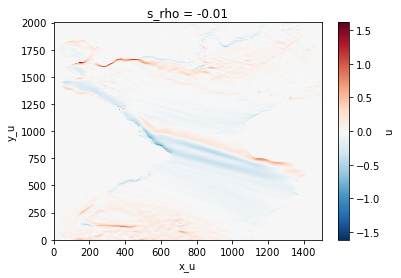

In [7]:
ds = xr.open_zarr(zarr_dir+'%s.zarr'%('u'))
ds.isel(s_rho=N-1)['u'].plot()

In [8]:
# kill scheduler, workers
cluster.close()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
distributed.utils - ERROR - 
Traceback (most recent call last):
  File "/home1/dunree/slgentil/.miniconda3/envs/croco/lib/python3.7/site-packages/distributed/utils.py", line 666, in log_errors
    yield
  File "/home1/dunree/slgentil/.miniconda3/envs/croco/lib/python3.7/site-packages/distributed/client.py", line 1283, in _close
    await gen.with_timeout(timedelta(seconds=2), list(coroutines))
concurrent.futures._base.CancelledError
distributed.utils - ERROR - 
Traceback (most recent call last):
  File "/home1/dunree/slgentil/.miniconda3/envs/croco/lib/python3.7/site-packages/distributed/utils.py", line 666, in log_errors
    yield
  File "/home1/dunree/slgentil/.miniconda3/envs/croco/lib/python3.7/site-packages/distributed/client.py", line 1012, in _reconnect
    await self._close()
  File "/home1/dunree/slgentil/.miniconda3/envs/croco/lib/python3.7/site-packages/distributed/client.py", l